<a href="https://colab.research.google.com/github/meesumabidi/sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install text2emotion


     |████████████████████████████████| 57 kB 2.0 MB/s 
     |████████████████████████████████| 170 kB 10.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=43f18325392155025d3bfb6557cf901c0cb9d57637983bfc6f25b244a820fabd
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
pip install emoji

In [ ]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import *
from datetime import date
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import text2emotion as te

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:

# Extract Time
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

# Find Authors or Contacts
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Finding Messages
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message


data = []
conversation = 'whatsapp chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)






FileNotFoundError: ignored

In [ ]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

df




,Date,Time,Author,Message
0,2021-06-03,1:29 AM,None,"+92 305 9005040 created group ""Mission Finland..."
1,2021-07-24,9:16 PM,None,You joined using this group's invite link
2,2021-07-24,9:56 PM,+92 332 3255525,<Media omitted>
3,2021-07-24,9:56 PM,+92 332 3255525,Uzair bhai pohanch v gy...
4,2021-07-24,9:56 PM,+92 305 9005040,Danish sab es ko 12 May se pehle appointment d...
...,...,...,...,...
9810,2021-10-07,11:16 PM,+92 300 5436039,Han 7 kgs shoulder py😁
9811,2021-10-07,11:16 PM,+92 333 9439347,bs if easy then go
9812,2021-10-07,11:59 PM,+92 341 7215152,Ji hai best serene airline pay jao
9813,2021-10-08,12:56 AM,+92 345 9888046,"Karachi se b try krna, karachi se flights xada..."


In [ ]:
# data = df.dropna()
# # data
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sentiments = SentimentIntensityAnalyzer()
# data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
# data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
# data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Message"]]
# print(data.head())



df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['weekday'] = df['Date'].dt.day_name()

df.head()





,Date,Time,Author,Message,year,month,day,hour,minute,weekday
0,2021-06-03,2021-11-02 01:29:00,None,"+92 305 9005040 created group ""Mission Finland...",2021,June,3,1,29,Thursday
1,2021-07-24,2021-11-02 21:16:00,None,You joined using this group's invite link,2021,July,24,21,16,Saturday
2,2021-07-24,2021-11-02 21:56:00,+92 332 3255525,<Media omitted>,2021,July,24,21,56,Saturday
3,2021-07-24,2021-11-02 21:56:00,+92 332 3255525,Uzair bhai pohanch v gy...,2021,July,24,21,56,Saturday
4,2021-07-24,2021-11-02 21:56:00,+92 305 9005040,Danish sab es ko 12 May se pehle appointment d...,2021,July,24,21,56,Saturday


In [ ]:
#column urlcount
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

#column Letter_Count
df['Letter_Count'] = df['Message'].apply(lambda s : len(s))
#column Word_Count
df['Word_Count'] = df['Message'].apply(lambda s : len(s.split(' ')))
df.head()





,Date,Time,Author,Message,year,month,day,hour,minute,weekday,urlcount,Letter_Count,Word_Count
0,2021-06-03,2021-11-02 01:29:00,None,"+92 305 9005040 created group ""Mission Finland...",2021,June,3,1,29,Thursday,0,53,8
1,2021-07-24,2021-11-02 21:16:00,None,You joined using this group's invite link,2021,July,24,21,16,Saturday,0,41,7
2,2021-07-24,2021-11-02 21:56:00,+92 332 3255525,<Media omitted>,2021,July,24,21,56,Saturday,0,15,2
3,2021-07-24,2021-11-02 21:56:00,+92 332 3255525,Uzair bhai pohanch v gy...,2021,July,24,21,56,Saturday,0,26,5
4,2021-07-24,2021-11-02 21:56:00,+92 305 9005040,Danish sab es ko 12 May se pehle appointment d...,2021,July,24,21,56,Saturday,0,57,12


In [ ]:
def split_count(text):
    emoji_list = []
    data = re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', text)
#   data = re.findall(u'(?:\uD83C[\uDF00-\uDFFF])|(?:\uD83D[\uDC00-\uDDFF])', text)
    
#   print(data)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
#             print(emoji_list)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
df.head(50)




,Date,Time,Author,Message,year,month,day,hour,minute,weekday,urlcount,Letter_Count,Word_Count,emoji
0,2021-06-03,2021-11-02 01:29:00,None,"+92 305 9005040 created group ""Mission Finland...",2021,June,3,1,29,Thursday,0,53,8,[]
1,2021-07-24,2021-11-02 21:16:00,None,You joined using this group's invite link,2021,July,24,21,16,Saturday,0,41,7,[]
2,2021-07-24,2021-11-02 21:56:00,+92 332 3255525,<Media omitted>,2021,July,24,21,56,Saturday,0,15,2,[]
3,2021-07-24,2021-11-02 21:56:00,+92 332 3255525,Uzair bhai pohanch v gy...,2021,July,24,21,56,Saturday,0,26,5,[]
4,2021-07-24,2021-11-02 21:56:00,+92 305 9005040,Danish sab es ko 12 May se pehle appointment d...,2021,July,24,21,56,Saturday,0,57,12,[]
5,2021-07-24,2021-11-02 21:57:00,+92 332 3255525,Family visa py gya tha!,2021,July,24,21,57,Saturday,0,23,5,[]
6,2021-07-24,2021-11-02 21:58:00,+92 300 5384080,Nai,2021,July,24,21,58,Saturday,0,3,1,[]
7,2021-07-24,2021-11-02 21:59:00,+92 300 5384080,Single male visa lia tha,2021,July,24,21,59,Saturday,0,24,5,[]
8,2021-07-24,2021-11-02 21:59:00,+92 305 9005040,Yes. Let me update. He showed his visa to emb...,2021,July,24,21,59,Saturday,0,259,53,[]
9,2021-07-24,2021-11-02 21:59:00,+92 332 3255525,Nopes!,2021,July,24,21,59,Saturday,0,6,1,[]


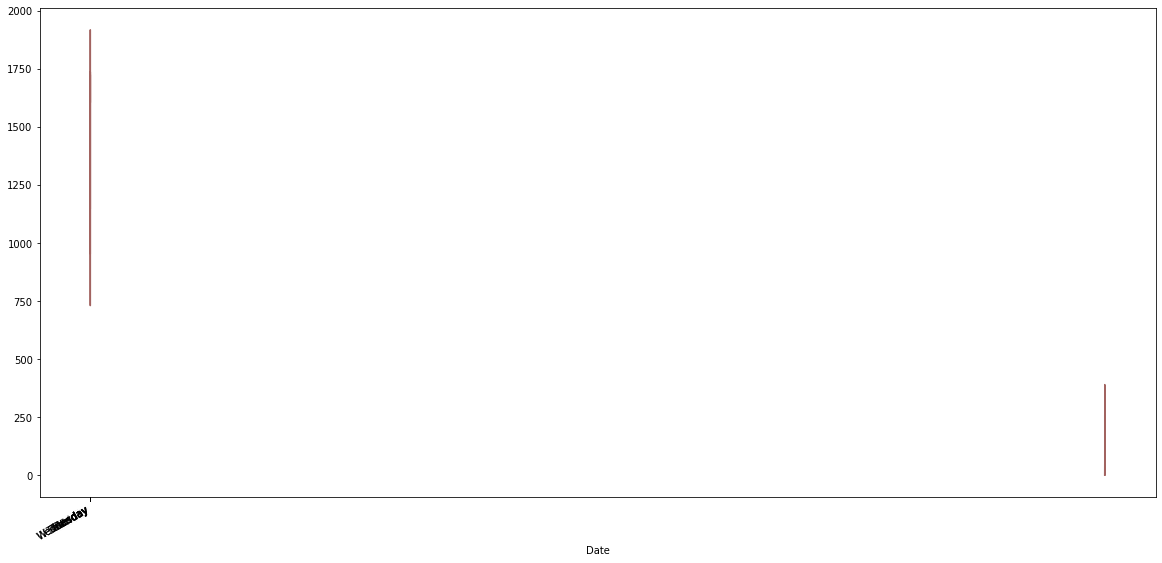

In [ ]:
# # chart shows the number of messages on weekdays and weekends (Time Series)

date_grouped = df.groupby('weekday')['Message'].count().plot(kind='line', figsize=(20,10), color='#A26360')

# # chart shows the number of messages date wise

date_grouped = df.groupby('Date')['Message'].count().plot(kind='line', figsize=(20,10), color='#A26360')

# # favorite days to chat with friends

weekday_grouped_msg =  (df.set_index('weekday')['Message']
                          .groupby(level=0)
                          .value_counts()
                          .groupby(level=0)
                          .sum()
                          .reset_index(name='count'))
weekday_grouped_msg

fig = px.line_polar(weekday_grouped_msg, r='count', theta='weekday', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(polar=dict(radialaxis=dict(visible=True, )),showlegend=False)
fig.show()



In [ ]:

# # Total Messages per hour

hour_grouped_msg =  (df.set_index('hour')['Message']
                          .groupby(level=0)
                          .value_counts()
                          .groupby(level=0)
                          .sum()
                          .reset_index(name='count'))
fig = px.bar(hour_grouped_msg, x='hour', y='count',
                 labels={'hour':'24 Hour Period'}, 
                 height=400)
fig.update_traces(marker_color='#EDCC8B', marker_line_color='#D4A29C',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Total Messages by Hour of the Day')
fig.show()


